In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
from scipy.stats import norm

In [13]:
pop = pd.read_excel('population.xlsx')
pop

,상품명,상품ID,성별,나이,결제금액,결제수,결제상품수량,환불금액,환불건수,환불수량
0,종근당건강 칼슘 앤 마그네슘 비타민D 아연 1000mg x 180정,89,남성,36~40,836600,42,54,80000,4,5
1,종근당건강 칼슘 앤 마그네슘 비타민D 아연 1000mg x 180정,89,남성,31~35,764900,46,50,46300,3,3
2,종근당건강 칼슘 앤 마그네슘 비타민D 아연 1000mg x 180정,89,여성,51~55,749200,30,48,77000,5,5
3,종근당건강 칼슘 앤 마그네슘 비타민D 아연 1000mg x 180정,89,남성,51~55,715600,34,46,15000,1,1
4,종근당건강 칼슘 앤 마그네슘 비타민D 아연 1000mg x 180정,89,여성,41~45,678400,35,44,60400,3,4
...,...,...,...,...,...,...,...,...,...,...
812,닥터린 초임계 알티지 오메가3 1025mg x 30캡슐,75,여성,71+,9680,1,1,0,0,0
813,GNM자연의품격 종합비타민 미네랄15 600mg x 90정,100,여성,46~50,8840,1,1,0,0,0
814,GNM자연의품격 건강한 간 밀크씨슬 900mg x 30정,64,여성,36~40,7000,1,1,0,0,0
815,GNM자연의품격 건강한 간 밀크씨슬 900mg x 30정,64,남성,51~55,6700,1,1,0,0,0


In [14]:
pop.drop(columns='상품ID', inplace=True)
pop.head()

,상품명,성별,나이,결제금액,결제수,결제상품수량,환불금액,환불건수,환불수량
0,종근당건강 칼슘 앤 마그네슘 비타민D 아연 1000mg x 180정,남성,36~40,836600,42,54,80000,4,5
1,종근당건강 칼슘 앤 마그네슘 비타민D 아연 1000mg x 180정,남성,31~35,764900,46,50,46300,3,3
2,종근당건강 칼슘 앤 마그네슘 비타민D 아연 1000mg x 180정,여성,51~55,749200,30,48,77000,5,5
3,종근당건강 칼슘 앤 마그네슘 비타민D 아연 1000mg x 180정,남성,51~55,715600,34,46,15000,1,1
4,종근당건강 칼슘 앤 마그네슘 비타민D 아연 1000mg x 180정,여성,41~45,678400,35,44,60400,3,4


In [108]:
pop.describe()

,결제금액,결제수,결제상품수량,환불금액,환불건수,환불수량
count,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000
mean,88971.823745,2.785802,4.821297,9903.378213,0.277846,0.565483
std,103137.639040,4.222012,6.897704,28692.956847,0.710503,2.394015
min,5000.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,28960.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,53000.000000,1.000000,2.000000,0.000000,0.000000,0.000000
75%,110000.000000,3.000000,5.000000,0.000000,0.000000,0.000000
max,836600.000000,46.000000,63.000000,429000.000000,11.000000,55.000000


In [15]:
gender_age_DF = pop.iloc[:,:6]
gender_age_DF

,상품명,성별,나이,결제금액,결제수,결제상품수량
0,종근당건강 칼슘 앤 마그네슘 비타민D 아연 1000mg x 180정,남성,36~40,836600,42,54
1,종근당건강 칼슘 앤 마그네슘 비타민D 아연 1000mg x 180정,남성,31~35,764900,46,50
2,종근당건강 칼슘 앤 마그네슘 비타민D 아연 1000mg x 180정,여성,51~55,749200,30,48
3,종근당건강 칼슘 앤 마그네슘 비타민D 아연 1000mg x 180정,남성,51~55,715600,34,46
4,종근당건강 칼슘 앤 마그네슘 비타민D 아연 1000mg x 180정,여성,41~45,678400,35,44
...,...,...,...,...,...,...
812,닥터린 초임계 알티지 오메가3 1025mg x 30캡슐,여성,71+,9680,1,1
813,GNM자연의품격 종합비타민 미네랄15 600mg x 90정,여성,46~50,8840,1,1
814,GNM자연의품격 건강한 간 밀크씨슬 900mg x 30정,여성,36~40,7000,1,1
815,GNM자연의품격 건강한 간 밀크씨슬 900mg x 30정,남성,51~55,6700,1,1


In [16]:
# 나이 구간 설정 (연령대 구간은 '10대'부터 '70대 이상'까지)
bins = [10, 20, 30, 40, 50, 60, 70, 100]

# 각 구간에 해당하는 레이블 지정
labels = ['10대', '20대', '30대', '40대', '50대', '60대', '70대 이상']

# '나이' 컬럼을 연령대로 변환
gender_age_DF['연령대'] = pd.cut(gender_age_DF['나이'].str.extract('(\d+)', expand=False).astype(int), bins=bins, labels=labels, right=False)
gender_age_DF

,상품명,성별,나이,결제금액,결제수,결제상품수량,연령대
0,종근당건강 칼슘 앤 마그네슘 비타민D 아연 1000mg x 180정,남성,36~40,836600,42,54,30대
1,종근당건강 칼슘 앤 마그네슘 비타민D 아연 1000mg x 180정,남성,31~35,764900,46,50,30대
2,종근당건강 칼슘 앤 마그네슘 비타민D 아연 1000mg x 180정,여성,51~55,749200,30,48,50대
3,종근당건강 칼슘 앤 마그네슘 비타민D 아연 1000mg x 180정,남성,51~55,715600,34,46,50대
4,종근당건강 칼슘 앤 마그네슘 비타민D 아연 1000mg x 180정,여성,41~45,678400,35,44,40대
...,...,...,...,...,...,...,...
812,닥터린 초임계 알티지 오메가3 1025mg x 30캡슐,여성,71+,9680,1,1,70대 이상
813,GNM자연의품격 종합비타민 미네랄15 600mg x 90정,여성,46~50,8840,1,1,40대
814,GNM자연의품격 건강한 간 밀크씨슬 900mg x 30정,여성,36~40,7000,1,1,30대
815,GNM자연의품격 건강한 간 밀크씨슬 900mg x 30정,남성,51~55,6700,1,1,50대


In [17]:
copy_gender_age_DF = gender_age_DF.copy()
copy_gender_age_DF

,상품명,성별,나이,결제금액,결제수,결제상품수량,연령대
0,종근당건강 칼슘 앤 마그네슘 비타민D 아연 1000mg x 180정,남성,36~40,836600,42,54,30대
1,종근당건강 칼슘 앤 마그네슘 비타민D 아연 1000mg x 180정,남성,31~35,764900,46,50,30대
2,종근당건강 칼슘 앤 마그네슘 비타민D 아연 1000mg x 180정,여성,51~55,749200,30,48,50대
3,종근당건강 칼슘 앤 마그네슘 비타민D 아연 1000mg x 180정,남성,51~55,715600,34,46,50대
4,종근당건강 칼슘 앤 마그네슘 비타민D 아연 1000mg x 180정,여성,41~45,678400,35,44,40대
...,...,...,...,...,...,...,...
812,닥터린 초임계 알티지 오메가3 1025mg x 30캡슐,여성,71+,9680,1,1,70대 이상
813,GNM자연의품격 종합비타민 미네랄15 600mg x 90정,여성,46~50,8840,1,1,40대
814,GNM자연의품격 건강한 간 밀크씨슬 900mg x 30정,여성,36~40,7000,1,1,30대
815,GNM자연의품격 건강한 간 밀크씨슬 900mg x 30정,남성,51~55,6700,1,1,50대


In [18]:
copy_gender_age_DF.drop(columns=['나이','상품명'], inplace=True)
copy_gender_age_DF

,성별,결제금액,결제수,결제상품수량,연령대
0,남성,836600,42,54,30대
1,남성,764900,46,50,30대
2,여성,749200,30,48,50대
3,남성,715600,34,46,50대
4,여성,678400,35,44,40대
...,...,...,...,...,...
812,여성,9680,1,1,70대 이상
813,여성,8840,1,1,40대
814,여성,7000,1,1,30대
815,남성,6700,1,1,50대


In [19]:
man_age_DF = copy_gender_age_DF[copy_gender_age_DF['성별'] == '남성']
man_age_DF

,성별,결제금액,결제수,결제상품수량,연령대
0,남성,836600,42,54,30대
1,남성,764900,46,50,30대
3,남성,715600,34,46,50대
5,남성,677000,35,44,40대
6,남성,611400,29,39,40대
...,...,...,...,...,...
806,남성,10000,1,1,70대 이상
809,남성,10000,1,1,40대
811,남성,9700,1,1,50대
815,남성,6700,1,1,50대


In [20]:
man_age_DF.drop(columns='성별', inplace=True)

C:\Users\KDP-50\AppData\Local\Temp\ipykernel_12476\3178785404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  man_age_DF.drop(columns='성별', inplace=True)


In [21]:
product_group = man_age_DF.groupby('연령대')

C:\Users\KDP-50\AppData\Local\Temp\ipykernel_12476\1567228535.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_group = man_age_DF.groupby('연령대')


In [22]:
man_group = product_group.agg('sum')
man_group

,결제금액,결제수,결제상품수량
연령대,,,
10대,75200,4,5
20대,4382800,165,276
30대,9921690,354,541
40대,9261100,306,504
50대,8873870,252,504
60대,4188660,122,216
70대 이상,1537700,37,99


In [23]:
man_group.index

CategoricalIndex(['10대', '20대', '30대', '40대', '50대', '60대', '70대 이상'], categories=['10대', '20대', '30대', '40대', '50대', '60대', '70대 이상'], ordered=True, dtype='category', name='연령대')

In [24]:
man_group.index.to_list()

['10대', '20대', '30대', '40대', '50대', '60대', '70대 이상']

In [25]:
man_group['결제금액']

연령대
10대         75200
20대       4382800
30대       9921690
40대       9261100
50대       8873870
60대       4188660
70대 이상    1537700
Name: 결제금액, dtype: int64

In [26]:
man_group.index

CategoricalIndex(['10대', '20대', '30대', '40대', '50대', '60대', '70대 이상'], categories=['10대', '20대', '30대', '40대', '50대', '60대', '70대 이상'], ordered=True, dtype='category', name='연령대')

In [27]:
man_group.columns

Index(['결제금액', '결제수', '결제상품수량'], dtype='object')

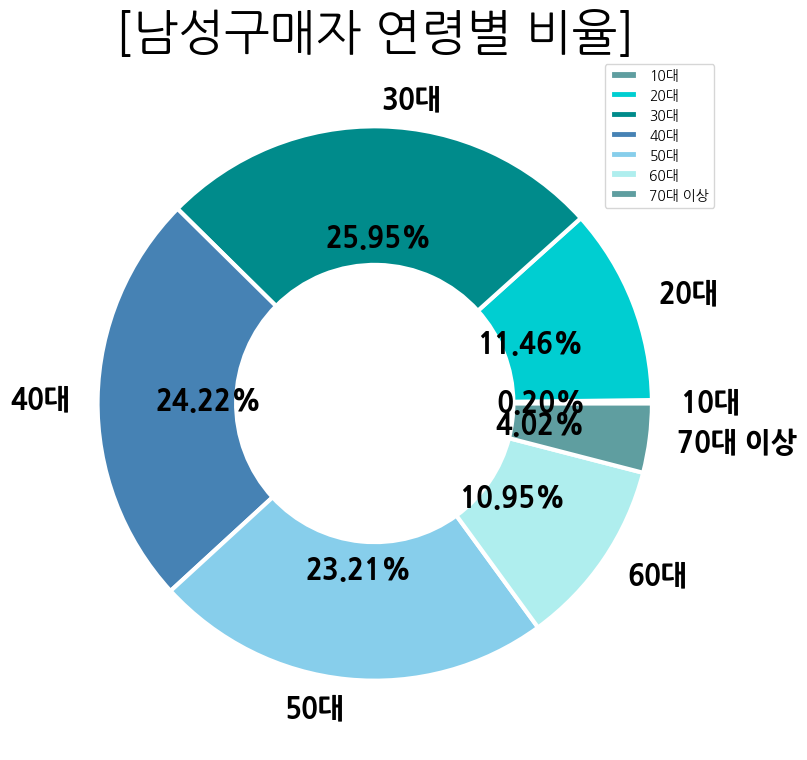

In [70]:
colors = ['#5F9EA0', '#00CED1', '#008B8B', '#4682B4', '#87CEEB', '#AFEEEE']
plt.figure(figsize=(15, 9))
plt.pie(man_group['결제금액'], labels=man_group.index.to_list(), autopct='%.2f%%',
        wedgeprops={'linewidth':3, 'width':.5, 'edgecolor':'w'}, colors=colors, textprops={'size':20, 'fontweight': 'bold', 'color':'black'})
plt.title('[남성구매자 연령별 비율]', size=35)
# plt.savefig('man_pie.png', transparent=True)  # 배경을 투명하게 저장
plt.legend()
plt.show()

In [71]:
copy_man_group = man_group.copy()
copy_man_group

,결제금액,결제수,결제상품수량
연령대,,,
10대,75200,4,5
20대,4382800,165,276
30대,9921690,354,541
40대,9261100,306,504
50대,8873870,252,504
60대,4188660,122,216
70대 이상,1537700,37,99


In [72]:
copy_man_group.loc['합계',:] = copy_man_group.sum(axis=0)
copy_man_group

,결제금액,결제수,결제상품수량
연령대,,,
10대,75200.0,4.0,5.0
20대,4382800.0,165.0,276.0
30대,9921690.0,354.0,541.0
40대,9261100.0,306.0,504.0
50대,8873870.0,252.0,504.0
60대,4188660.0,122.0,216.0
70대 이상,1537700.0,37.0,99.0
합계,38241020.0,1240.0,2145.0


In [73]:
copy_man_group['결제수']

연령대
10대          4.0
20대        165.0
30대        354.0
40대        306.0
50대        252.0
60대        122.0
70대 이상      37.0
합계        1240.0
Name: 결제수, dtype: float64

In [74]:
x = np.arange(len(man_group.index))
x

array([0, 1, 2, 3, 4, 5, 6])

In [75]:
man_group.index

CategoricalIndex(['10대', '20대', '30대', '40대', '50대', '60대', '70대 이상'], categories=['10대', '20대', '30대', '40대', '50대', '60대', '70대 이상'], ordered=True, dtype='category', name='연령대')

In [76]:
y1 = np.array(man_group.index)
y1

array(['10대', '20대', '30대', '40대', '50대', '60대', '70대 이상'], dtype=object)

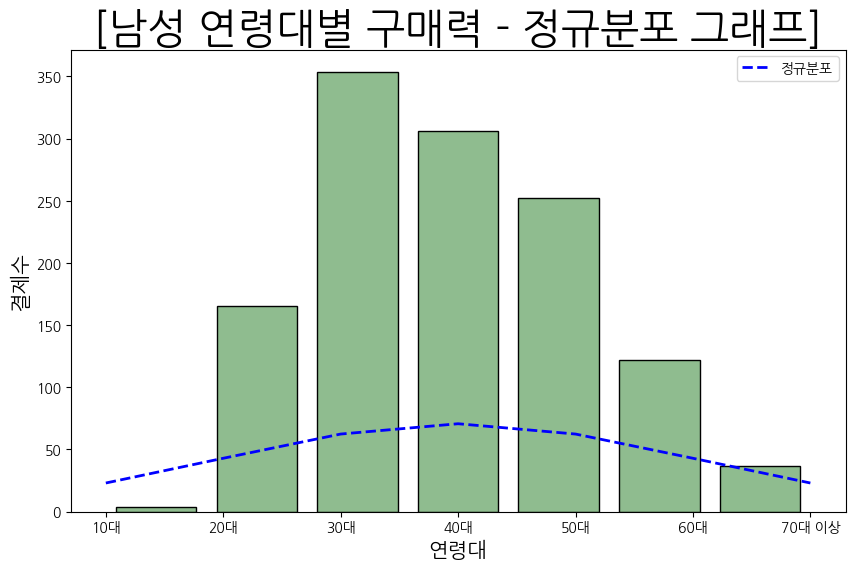

In [77]:
# 데이터 준비 (예시로 'man_group'을 가정)
# man_group['결제수']는 결제수를 포함하는 Series, man_group.index는 연령대임
y1 = np.array(man_group.index)  # 연령대 (범주형)

plt.figure(figsize=(10, 6))

# 히스토그램 그리기
plt.hist(np.arange(len(man_group.index)), bins=len(man_group.index), weights=man_group['결제수'], 
         edgecolor='black', rwidth=0.8, color='darkseagreen')

plt.title('[남성 연령대별 구매력 - 정규분포 그래프]', size=30)
plt.xlabel('연령대', size=15)
plt.ylabel('결제수', size=15)

# 정규분포 계산
x = np.arange(len(man_group.index))  # 인덱스를 사용하여 정규분포 계산
mean = np.mean(x)
std = np.std(x)
y2 = norm.pdf(x, mean, std) * max(man_group['결제수'])  # 스케일 조정

# 정규분포 곡선 그리기
plt.plot(x, y2, 'b--', lw=2, label='정규분포')

# X축 레이블을 연령대로 변경
plt.xticks(np.arange(len(man_group.index)), man_group.index)

# 그래프 보여주기
plt.legend()
plt.show()

In [78]:
a = np.array(man_group['결제수'])
a

array([  4, 165, 354, 306, 252, 122,  37], dtype=int64)

In [79]:
mean_bar = np.mean(a)
mean_bar

177.14285714285714

### 평균 선 그래프 추가

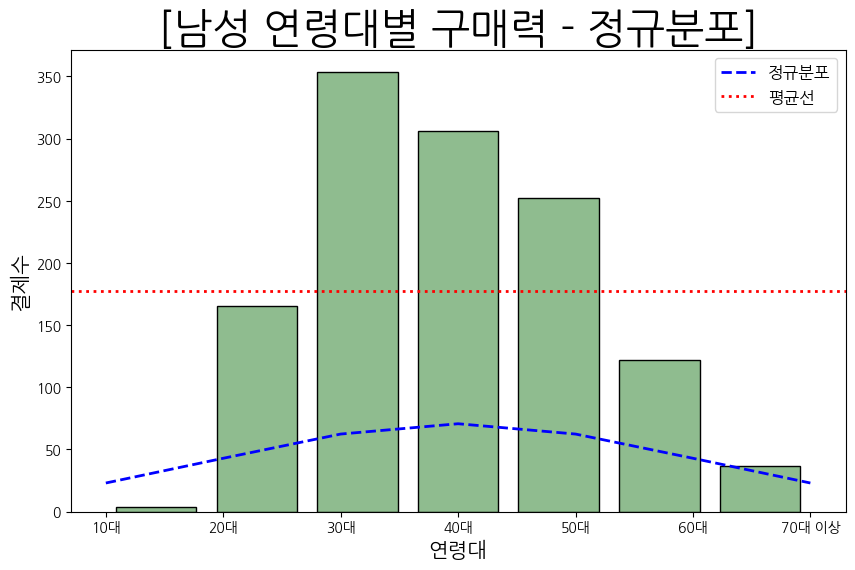

In [80]:
# 데이터 준비 (예시로 'man_group'을 가정)
# man_group['결제수']는 결제수를 포함하는 Series, man_group.index는 연령대임
y1 = np.array(man_group.index)  # 연령대 (범주형)

plt.figure(figsize=(10, 6))

# 히스토그램 그리기
plt.hist(np.arange(len(man_group.index)), bins=len(man_group.index), weights=man_group['결제수'], 
         edgecolor='black', rwidth=0.8, color='darkseagreen')

plt.title('[남성 연령대별 구매력 - 정규분포]', size=30)
plt.xlabel('연령대', size=15)
plt.ylabel('결제수', size=15)

# 정규분포 계산
x = np.arange(len(man_group.index))  # 인덱스를 사용하여 정규분포 계산
mean = np.mean(x)
std = np.std(x)
y21 = norm.pdf(x, mean, std) * max(man_group['결제수'])  # 스케일 조정

# 정규분포 곡선 그리기
plt.plot(x, y21, 'b--', lw=2, label='정규분포')

# X축 레이블을 연령대로 변경
plt.xticks(np.arange(len(man_group.index)), man_group.index)

# 평균 선 그리기
plt.axhline(y=mean_bar, color='r', linestyle=':', lw=2, label='평균선')

# 범례 설정 
plt.legend(fontsize=12)

# 그래프 그리기
plt.show()

In [81]:
# 정규분포 값
y21

array([22.92461443, 42.82881824, 62.31556284, 70.61278363, 62.31556284,
       42.82881824, 22.92461443])

In [82]:
np.var(a)

15184.693877551019

In [83]:
np.std(a,ddof=1)

133.0994973336721

In [84]:
b = np.array(man_group.index)
b

array(['10대', '20대', '30대', '40대', '50대', '60대', '70대 이상'], dtype=object)

In [85]:
woman_age_DF = copy_gender_age_DF[copy_gender_age_DF['성별'] == '여성']
woman_age_DF

,성별,결제금액,결제수,결제상품수량,연령대
2,여성,749200,30,48,50대
4,여성,678400,35,44,40대
7,여성,571000,4,22,20대
8,여성,524000,28,34,40대
11,여성,483200,17,35,40대
...,...,...,...,...,...
808,여성,10000,1,1,20대
810,여성,10000,1,1,20대
812,여성,9680,1,1,70대 이상
813,여성,8840,1,1,40대


In [86]:
woman_age_DF.drop(columns='성별', inplace=True)
product_group2 = woman_age_DF.groupby('연령대')
woman_group = product_group2.agg('sum')
woman_group

C:\Users\KDP-50\AppData\Local\Temp\ipykernel_12476\3812861599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  woman_age_DF.drop(columns='성별', inplace=True)
C:\Users\KDP-50\AppData\Local\Temp\ipykernel_12476\3812861599.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_group2 = woman_age_DF.groupby('연령대')


,결제금액,결제수,결제상품수량
연령대,,,
10대,56880,1,1
20대,3265190,102,173
30대,6756100,218,357
40대,10193280,325,521
50대,9826690,281,499
60대,3653340,93,200
70대 이상,697480,16,43


In [87]:
woman_group.index.to_list()
woman_group['결제금액']

연령대
10대          56880
20대        3265190
30대        6756100
40대       10193280
50대        9826690
60대        3653340
70대 이상      697480
Name: 결제금액, dtype: int64

In [88]:
woman_group.index
woman_group.columns

Index(['결제금액', '결제수', '결제상품수량'], dtype='object')

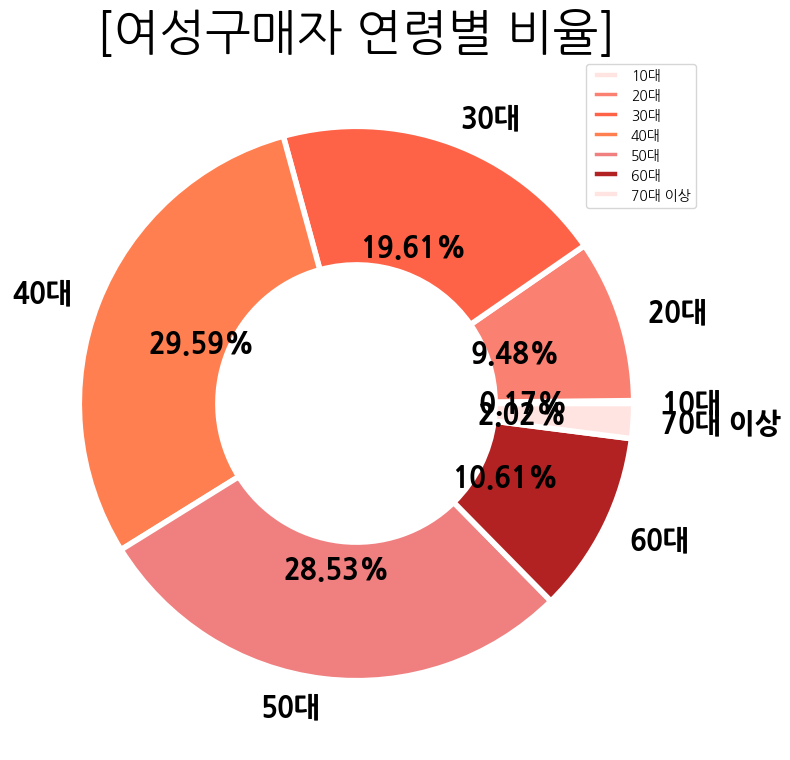

In [102]:
colors = ['#FFE4E1', '#FA8072', '#FF6347', '#FF7F50', '#F08080', '#B22222']
plt.figure(figsize=(15, 9))
plt.pie(woman_group['결제금액'], labels=woman_group.index.to_list(), autopct='%.2f%%',
        wedgeprops={'linewidth':4, 'width':0.5, 'edgecolor':'w'}, colors=colors, textprops={'size':20, 'fontweight': 'bold'})
plt.title('[여성구매자 연령별 비율]', size=35)
plt.legend()
plt.show()

In [90]:
copy_woman_group = woman_group.copy()
copy_woman_group

,결제금액,결제수,결제상품수량
연령대,,,
10대,56880,1,1
20대,3265190,102,173
30대,6756100,218,357
40대,10193280,325,521
50대,9826690,281,499
60대,3653340,93,200
70대 이상,697480,16,43


In [91]:
copy_woman_group.loc['합계',:] = copy_woman_group.sum(axis=0)
copy_woman_group

,결제금액,결제수,결제상품수량
연령대,,,
10대,56880.0,1.0,1.0
20대,3265190.0,102.0,173.0
30대,6756100.0,218.0,357.0
40대,10193280.0,325.0,521.0
50대,9826690.0,281.0,499.0
60대,3653340.0,93.0,200.0
70대 이상,697480.0,16.0,43.0
합계,34448960.0,1036.0,1794.0


In [92]:
copy_woman_group['결제수']

연령대
10대          1.0
20대        102.0
30대        218.0
40대        325.0
50대        281.0
60대         93.0
70대 이상      16.0
합계        1036.0
Name: 결제수, dtype: float64

In [93]:
a2 = np.array(woman_group['결제수'])
a2

array([  1, 102, 218, 325, 281,  93,  16], dtype=int64)

In [94]:
mean_bar2 = np.mean(a2)

In [95]:
np.var(a2)

14013.142857142857

In [96]:
np.std(a2)

118.37712134168011

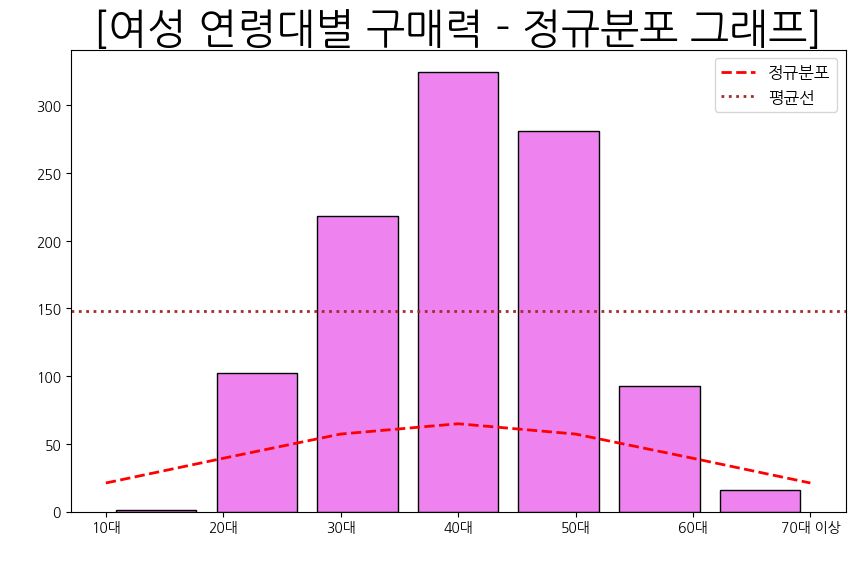

In [106]:
y11 = np.array(woman_group.index)

plt.figure(figsize=(10, 6))

plt.hist(woman_group.index, bins=len(woman_group.index), weights=woman_group['결제수'], 
         edgecolor='black', rwidth=0.8, color='violet')

plt.title('[여성 연령대별 구매력 - 정규분포 그래프]', size=30)
plt.xlabel('연령대', size=15, color='w')
plt.ylabel('결제수', size=15, color='w')

# 정규분포 계산
x2 = np.arange(len(woman_group.index))  # 인덱스를 사용하여 정규분포 계산
mean = np.mean(x2)
std = np.std(x2)
y22 = norm.pdf(x2, mean, std) * max(woman_group['결제수'])  # 스케일 조정

# 정규분포 곡선 그리기
plt.plot(x2, y22, 'r--', lw=2, label='정규분포')

# 평균 선 그리기
plt.axhline(y=mean_bar2, color='brown', linestyle=':', lw=2, label='평균선')

# X축 레이블을 연령대로 변경
plt.xticks(np.arange(len(woman_group.index)), woman_group.index)

# 범례 설정
plt.legend(fontsize=12)

# 그래프 그리기
plt.show()